# WeChat Pay Data Analysis
### Kay Zhuang| CPSC 222 | Dr. Gina Sprint | 4-15-2022
#### In this project, We will know how much, when, and with whom I have spent while in China.

### Introduction
* Bills usually show changes in a person's life, and through changes in spending, you can determine what period people are in and their relationships. This bill is for all the bills in 2021 before I came to the US. So the bill only selects the part from January to September.
* The bill format is csv, which I download from the WeChat payment program. 
    * There are 1232 transaction records. Also has the following categories “交易时间,交易类型,交易对方,商品,收/支,金额(元),支付方式,当前状态,交易单号,商户单号,备注”
        * 交易时间 = transaction time
        * 交易类型 = transaction type
        * 交易对方 = transaction counterparty
        * 商品 = commodity
        * 收/支 = receipt/expenditure
        * 金额(元) = amount (rmb)
        * 支付方式 = payment method
        * 当前状态 = current status
        * 交易单号 = transaction order number
        * 商户单号 = merchant order number
        * 备注 = remarks

#### Goal
* Find out the relationship between how much money I use and relationships and time.
    * Can money express love?
    * Do I usually spend more than usual on vacations?
    * The relationship between income and traditional Chinese interpersonal relationships.

### Project started
#### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from scipy import stats
import utils
import importlib
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\zhuan\\Desktop\\CS\\CPSC222\\pj\\utils.py'>

### Now read the data by using pandas

In [2]:
df = pd.read_csv("微信支付账单.csv")

### I don't need something in the dataframe becuase they are meaningless to present the result from my bill
* We do not need to know order number. That is not my issue but the IT company's. They have to store that data to check their income and outcome.
* Situation of the order. I never have faild payment so the situation of orders always paying successfully.
* Remarks is not nececary because through WeChat Pay, I do not use the comment but in alipay I would. But alipay's bill file has lots of problem.
* ¥ symbol will make the price cannot be calculated. So drop it
* Set date time as a format
* Split income and expenses into two dataframes

In [3]:
df = df.drop(columns=['交易单号','商户单号','当前状态','备注'])
df["金额(元)"] = df["金额(元)"].map(lambda x: str(x).lstrip('¥').rstrip('¥')).astype(float)
df["交易时间"] = pd.to_datetime(df["交易时间"],format='%Y-%m-%d') 
df['交易时间'] = df['交易时间'].map(lambda x: str(x)[:-9])
df_income = df.loc[df['收/支'] == '收入']
df_out = df.loc[df['收/支'] == '支出']

## interpersonal relationship
* Relationships vary from country to country, and some women in China believe that the amount of money their spouse pays for them can measure the level of their love. During holidays, couples express their love by transferring money and giving gifts. Coincidentally, I had two ex-girlfriends last year. I can pull out my records of transfers to them and compare which one I "like" and which one "likes" me better.

I got money from 1st ex amount is:  1561.0
I got money from 2st ex amount is:  198.9


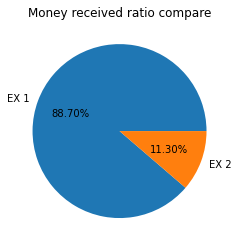

In [4]:
df_ex1 = df_income.loc[df_income['交易对方'] == '清和月五']
df_ex2 = df_income.loc[df_income['交易对方'] == 'T__a']
print("I got money from 1st ex amount is: ", df_ex1['金额(元)'].sum())
print("I got money from 2st ex amount is: ", df_ex2['金额(元)'].sum())
X_income = [1561.0, 198.9]
labels = ['EX 1', 'EX 2']
fig = plt.figure()
plt.pie(X_income,labels=labels,autopct='%1.2f%%')
plt.title("Money received ratio compare")
plt.show()  

I send money to 1st ex amount is:  3587.17
I send money to 2st ex amount is:  6395.0


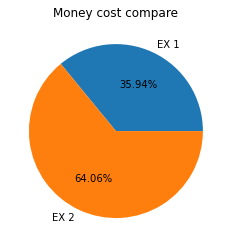

In [5]:
df_ex1o = df_out.loc[df_out['交易对方'] == '清和月五']
df_ex2o = df_out.loc[df_out['交易对方'] == '.']
print("I send money to 1st ex amount is: ", df_ex1o['金额(元)'].sum())
print("I send money to 2st ex amount is: ", df_ex2o['金额(元)'].sum())
fig = plt.figure()
X = [3587.17,6395.0]
plt.pie(X,labels=labels,autopct='%1.2f%%')
plt.title("Money cost compare")
plt.show()  

### Outcome
* It is often said that those who are loved have nothing to fear, and those who are loved often give less.
* Judging by the pictures and numbers, the first ex was more like me, but I paid more for the second ex.

## Hypothsis Test
* I think I always spend more money when I in the relationship, And the coincedence is first 9 months in China I have 6 months during that period. Juan-March yes April-June no and July-Sep yes
* My psychological expectation is that the consumption during the relationship should not be higher than 1.5 times the usual.
* Standard is 1.5 times normal days money payment per order.

In [6]:
df_r = pd.read_csv("微信支付账单(20210101-20210401).csv")
df_aj = pd.read_csv("微信支付账单(20210401-20210701).csv")
df_r = df_r.drop(columns=['交易单号','商户单号','当前状态','备注'])
df_r["金额(元)"] = df_r["金额(元)"].map(lambda x: str(x).lstrip('¥').rstrip('¥')).astype(float)
df_r['交易时间'] = df_r['交易时间'].map(lambda x: str(x)[:-9])
df_aj = df_aj.drop(columns=['交易单号','商户单号','当前状态','备注'])
df_aj["金额(元)"] = df_aj["金额(元)"].map(lambda x: str(x).lstrip('¥').rstrip('¥')).astype(float)
df_aj['交易时间'] = df_aj['交易时间'].map(lambda x: str(x)[:-9])
df_ro = df_r.loc[df_r['收/支'] == '支出']
df_ajo = df_aj.loc[df_aj['收/支'] == '支出']
df_ro = df_ro.groupby(by='交易时间').sum()
df_ajo = df_ajo.groupby(by='交易时间').sum()
standard = df_ajo["金额(元)"].mean() * 1.5
print(standard," rmb")

287.69486842105255  rmb


## The standard is 287.7 rmb per day. It convert to USD is $ 43.5


# One Sample, One-tailed Test 
> The average cost per day for the six months was 488.5 yuan, with a deviation of 1765. Am I spending 1.5 times what I would normally expect to spend in a relationship, at the 0.05 significance level, am I over budget?

Step 1: State the null and alternate hypothesis:
* $H_0$: $\mu \leq 287.7$
* $H_1$: $\mu$ > 287.7

Step 2: Select the level of significance:
* $\alpha$ = 0.05

Step 3: Select the appropriate test statistic:
* $t=\frac{\overline{x} - \mu}{s / \sqrt{n}}$

In [7]:
# Sample Average
sample_mean=df_ro['金额(元)'].mean()
# Sample Standard Deviation
sample_std=df_ro['金额(元)'].std()
alpha = 0.05
print(sample_mean)
print(sample_std)
t,p_ =stats.ttest_1samp(df_ro['金额(元)'],standard)
print('t=',t,'p(double tail)=',p_) 
p = p_/2
if t < 0 and p < alpha: # test t_computed < 0 for a left-tailed test
    print("Reject H0, p-value:", p )
else:
    print("Fail to reject H0, p-value:", p)


488.50524475524486
1765.006133730248
t= 1.3605294589257186 p(double tail)= 0.1758181118878576
Fail to reject H0, p-value: 0.0879090559439288


Conclusion
* At the 0.05 significance level, we can conclude that I spend more than the standard I made.
* I should save my money :(

## Traditions
* Chinese holiday tradition is to give money, and children will also receive money from adults as a blessing for their further education.
* I will show a histogram for 9 months.

C:\Users\zhuan\AppData\Local\Temp/ipykernel_28280/2013006975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_income['交易时间'] = df_income['交易时间'].map(lambda x: str(x)[:-3])


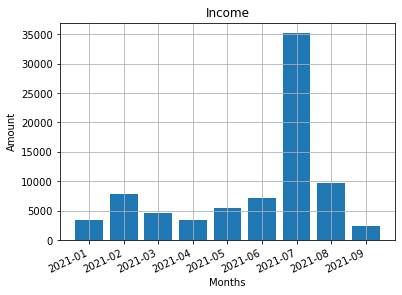

In [8]:
df_income['交易时间'] = df_income['交易时间'].map(lambda x: str(x)[:-3])
df_mi = df_income.groupby(by='交易时间').sum()
utils.bar_chart_example(df_mi.index,df_mi['金额(元)'],"Income","Months","Amount")

* 2021-02
    * During Chinese New Year, elders usually give red envelopes to younger ones.、
* 2021-07
    * During this time our family held a celebratory banquet to celebrate my study abroad. (When someone in the family goes to college, there is usually a banquet)
    * The Chinese have a custom that males are the key to family reproduction. Surnames are passed down with men, and all my contemporaries are girls. So I am the only male surnamed Zhuang in our genre, and the elders usually give away more money than usual. (Of course I support gender equality)
* 2021-08
    * People who missed the banquet because of the epidemic usually wait until they meet later to send gifts.

In [9]:
print(df_income['金额(元)'].sum())

79406.96


### So I totally get 79406.96 rmb last year.
* It can be converted to $12310

In [10]:
print(df_out['金额(元)'].sum())

84432.79000000001


### But I spend 84433 rmb last year
* It can be converted to $13090
* That is meaning I did not save any money last year

In [11]:
df_o = df_out.groupby(by='交易类型').sum()


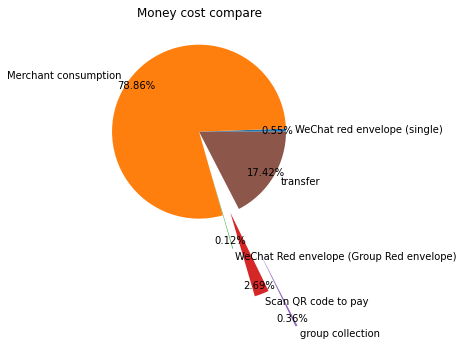

In [12]:
fig = plt.figure()
x = [462.35, 66576.44, 100.00, 2271.37, 304.05, 14707.37]
lbs = ['WeChat red envelope (single)','Merchant consumption', 'WeChat Red envelope (Group Red envelope)', 'Scan QR code to pay', 'group collection', 'transfer']
plt.pie(x,labels=lbs,autopct='%1.2f%%',pctdistance=0.9,explode=(0,0,0.4,1,1.5,0))
plt.title("Money cost compare")
plt.show()  

Merchant consumption is usually parking, restaurants, and shops. This is my main consumption method. However, the data sources do not clearly indicate what these consumptions are. Only write the company name, or the name of the restaurant, I have no way to clear it out. Because there are too many different names, and it is difficult to find similar keywords to organize.

# Classification
* For this, I wonder if the type of transaction can be identified by the amount of the transaction?
    * But this is more difficult to achieve, because no matter what type of transaction, the size of the transaction amount is possible.

It is not work
* I tried different ways to do it but sometimes it shown the samples length is not match, or Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
* I did not find other more suitable samples to make predictions. The uncertainty of the price data is too great.
* If the commodity consumed can be specific to the type, it should be possible to make kNN predictions. Because I usually spend 100-300 RMB for meals and 5-30 RMB for parking. But the amount of money does not only include these, and they are also unified for merchant consumption.
* That's one of the downsides of doing analytics with bills, it would help if I had more data that I could use for analytics, unfortunately I found a lot of Chinese software that I've used in the past and they don't provide customer data. Some websites are blocked by the firewall through the school network. Maybe it's time to try software like Spotify.

# Conclusion
* Until early this morning I was still trying to find a sample to make predictions, but without success. But looking at your bills from a fresh perspective pays off.
* I think this project can provide an opportunity for people to look at the consumption of their own life from another perspective. Because it doesn't feel like a lot of spending, like I don't feel like I've spent more than $10,000 at all. (Of course, buying a car this year has already exceeded this number.) If I can get a better idea of consumption out of it, it must be better.
* If the source of the data is less ambiguous, then the analysis can be done better. Because the data sources are all in Chinese, and the results of the translation program are not satisfactory, so I gave up using the translation code.
* Seeing that money spent on other people doesn't turn out well is more regrettable (lol). So I figured I'd spend it on my loved ones and myself after that.